difference between lock and Rlock


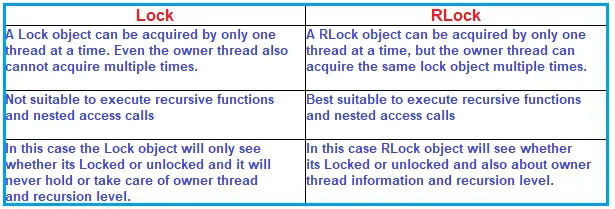

In [47]:
class X:
    def __init__(self):
        self.a = 1
        self.b = 2
        self.lock = threading.RLock()

    def changeA(self):
        with self.lock:
            self.a = self.a + 1
            print(self.a)

    def changeB(self):
        with self.lock:
            self.b = self.b + 1
            print(self.b)

    def changeAandB(self):
        # you can use chanceA and changeB thread-safe!
        with self.lock:
            self.changeA() # a usual lock would block at here
            self.changeB()

x=X()

for i in range(5):
    thread=threading.Thread(target=x.changeAandB())
    thread.start()
    

2
3
3
4
4
5
5
6
6
7


In [28]:
import threading
import time
l=threading.RLock()
def factorial(n):
   l.acquire()
   time.sleep(0.5)
   if n==0:
       result=1
   else:
       result=n*factorial(n-1)
   l.release()
   return result

def results(n):
   print("The Factorial of", n, "is:", factorial(n))

for i in range(10):
    thread=threading.Thread(target=results, args=(i*2,))
    thread.start()



The Factorial ofThe Factorial of 2 is: 2
 0 is: 1
The Factorial of 4 is: 24
The Factorial of 6 is: 720
The Factorial of 8 is: 40320
The Factorial of 10 is: 3628800
The Factorial of 12 is: 479001600
The Factorial of 14 is: 87178291200
The Factorial of 16 is: 20922789888000
The Factorial of 18 is: 6402373705728000


In [12]:
import threading

rlock = threading.RLock()

def recursive_function(n):
    with rlock:  # Reentrant lock can be acquired multiple times
        if n > 0:
            recursive_function(n - 1)
        print(f"Processing level {n}")

t1=thread.